<a href="https://colab.research.google.com/github/akashgardas/Machine-Learning/blob/main/Assignment/Amazon_Products_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [38]:
import os
os.listdir('drive/MyDrive/Tek works')

['Bengaluru_House_Data.csv',
 'Amazon_electronics.csv',
 'Exported Datasets',
 '.ipynb_checkpoints',
 'amazon_products_dataset.csv']

## Loading & Inspecting Dataset

Task 1 — Load & Inspect the Dataset
1. Load the dataset into your notebook.
2. Display first and last 5 rows.
3. Print `.shape` and `.info()`.
4. Show list of unique product categories.
5. Identify columns that require cleaning or type conversion.

In [39]:
df = pd.read_csv('drive/MyDrive/Tek works/amazon_products_dataset.csv')

In [40]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0


In [41]:
df.tail()

,title,brand,category,actual_price,discount_price,rating,rating_count
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0
1999,Smartphone with AMOLED Display,Boat,Headphones,31662.0,31047.0,3.2,1064.0


In [42]:
df.shape

(2000, 7)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        1998 non-null   object 
 3   actual_price    1998 non-null   float64
 4   discount_price  1999 non-null   float64
 5   rating          1996 non-null   float64
 6   rating_count    1996 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [44]:
# Unique product categories
u_prods = df['category'].unique()
print(f"No. of unique categories: {u_prods.size}")
print(f"Products: \n{u_prods}")

No. of unique categories: 9
Products: 
['Laptop' 'Smartwatch' 'Headphones' 'Camera' 'Monitor' 'Speaker' 'Tablet'
 'Smartphone' nan]


In [45]:
print("Cols require type conversion = None")

Cols require type conversion = None


## Cleaning the Dataset
Task 2 — Clean the Dataset
1. Identify missing values using `.isnull()` `.sum()`.
2. Fill missing numeric values (`discount_price`, `rating`, etc.) using `mean` or `median`.
3. Fill missing categorical values (`brand`, `category`) with "Unknown".
4. Remove all duplicate rows.
5. Convert numeric columns to their correct data types.
6. Reset index after cleaning.

In [46]:
# Identifying missing values
df.isnull().sum()

,0
title,0
brand,0
category,2
actual_price,2
discount_price,1
rating,4
rating_count,4


In [47]:
# filling missing values
# brand - "Unknown"
df['brand'] = df['brand'].fillna('Unknown')

In [48]:
# category - "Unknown"
df['category'] = df['category'].fillna('Unknown')

In [49]:
# discount_price - mean
df['discount_price'] = df['discount_price'].fillna(df['discount_price'].mean())

In [50]:
# rating - median
df['rating'] = df['rating'].fillna(df['rating'].median())

In [51]:
# rating_count - mean
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].mean())

In [53]:
# actual_price - mean
df['actual_price'] = df['actual_price'].fillna(df['actual_price'].mean())

In [54]:
df.isnull().sum()

,0
title,0
brand,0
category,0
actual_price,0
discount_price,0
rating,0
rating_count,0


In [55]:
# removing duplicate rows
df.drop_duplicates(inplace=True)

In [56]:
print('No datatype conversions needed')

No datatype conversions needed


In [58]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        2000 non-null   object 
 3   actual_price    2000 non-null   float64
 4   discount_price  2000 non-null   float64
 5   rating          2000 non-null   float64
 6   rating_count    2000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


## Data Analysis
Task 3 — Data Analysis
1. Identify the top 5 most expensive products (`actual_price`).
2. Find the brand with the highest number of products.
3. Compute the average discount percentage for each brand.
4. Identify products with `rating` ≥ 4.5 and `rating_count` ≥ 2000.
5. Compute category-wise average price.

In [64]:
# Top 5 most expensive products
top_prod = df.groupby('title')['actual_price'].max().sort_values(ascending=False).head()
top_prod

,actual_price
title,
Android Tablet,79993.0
Gaming Laptop,79869.0
4K Action Camera,79857.0
Smart Fitness Watch,79736.0
High Resolution Monitor,79701.0


In [65]:
# Brand with highest no of products
df.groupby('brand')['title'].count().sort_values(ascending=False).head()

,title
brand,
Boat,214
LG,208
Sony,208
JBL,207
HP,206


In [74]:
# Discount percentage for each product
df['discount_percentage'] = (df['actual_price'] - df['discount_price']) / df['actual_price'] * 100

# Avg discount percentage each branch offers
df.groupby('brand')['discount_percentage'].mean()

,discount_percentage
brand,
Apple,12.721996
Boat,12.546502
Dell,11.165004
HP,11.501202
JBL,11.370137
LG,11.968799
Mi,10.162308
OnePlus,11.380987
Samsung,9.302573


In [68]:
# products with specific rating and rating_count
df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)]

,title,brand,category,actual_price,discount_price,rating,rating_count
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0
51,Wireless Bluetooth Headphones,Dell,Headphones,61569.0,59372.0,4.5,13402.0
52,Laptop with SSD Storage,Boat,Smartwatch,76286.0,75621.0,5.0,7433.0
59,Gaming Laptop,Samsung,Tablet,45250.0,44710.0,4.7,4643.0
...,...,...,...,...,...,...,...
1949,Portable Bluetooth Speaker,OnePlus,Tablet,59325.0,55777.0,4.5,19070.0
1970,Android Tablet,Boat,Camera,20841.0,17765.0,4.5,10252.0
1975,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0
1982,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0


In [70]:
# Category-wise avg price
df.groupby('category')['actual_price'].mean()

,actual_price
category,
Camera,40352.246094
Headphones,39576.147679
Laptop,40822.874477
Monitor,39949.431596
Smartphone,37909.529412
Smartwatch,38316.913934
Speaker,39683.449141
Tablet,39943.815217
Unknown,33610.500000


## Feature Engineering

Task 4 — Programming Task: Feature Engineering + Logical Filters

Task 4A — Create New Columns
Write code to create:
1. `discount_percent` = ((actual_price - discount_price) / actual_price) * 100
2. `price_category` based on:
actual_price < 500 → `"Budget"`
500 ≤ price < 2000 → `"Midrange"`
price ≥ 2000 → `"Premium"`
3. `popularity_score` = rating * log(rating_count + 1)




In [77]:
# price category
def get_price_category(price):
  if price < 500:
    return 'Budget'
  elif price >= 2000:
    return 'Midrange'
  return 'Premium'

df['price_category'] = df['actual_price'].apply(get_price_category)
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percentage,price_category
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,Midrange
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,Midrange
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,Midrange
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,Midrange
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,Midrange


In [78]:
# popularity score
df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percentage,price_category,popularity_score
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,Midrange,19.924860
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,Midrange,22.795289
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,Midrange,14.879318
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,Midrange,36.156019
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,Midrange,46.858883


Task 4B — Filtering Using New Columns
Using the newly created columns:
1. Show top 10 highest `popularity_score` products.
2. Show all `Premium` category items with `discount_percent` > 40%.
3. Show all products whose title contains `"Bluetooth"` (string filter).
4. Show products where:
  - `rating` >= 4.0
  - `discount_percent` between 20% to 50%
  - `popularity_score` in the top 30% percentile
  
(Use `.between()` and `.quantile()`)

In [79]:
# top 10 popular products
df.groupby('title')['popularity_score'].max().sort_values(ascending=False).head(10)

,popularity_score
title,
Smartphone with AMOLED Display,49.130602
Portable Bluetooth Speaker,48.928304
Wireless Bluetooth Headphones,48.625690
High Resolution Monitor,48.388891
Laptop with SSD Storage,48.248857
Gaming Laptop,47.848110
4K Action Camera,47.803700
Android Tablet,47.767502
Noise Cancelling Earbuds,47.390041


In [81]:
# Premium products with more than 40% discount
df[(df['price_category'] == 'Premium') & (df['discount_percentage']  > 40)]

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percentage,price_category,popularity_score
208,Gaming Laptop,Dell,Laptop,1484.0,879.0,1.7,1295.0,40.768194,Premium,12.183964
537,Gaming Laptop,HP,Tablet,1815.0,280.0,2.5,11344.0,84.573003,Premium,23.341331
560,Laptop with SSD Storage,OnePlus,Camera,1762.0,399.0,2.9,6387.0,77.355278,Premium,25.410312
939,Smart Fitness Watch,JBL,Monitor,1086.0,464.0,1.7,15816.0,57.274401,Premium,16.437029
1208,Android Tablet,OnePlus,Smartwatch,954.0,464.0,4.6,17175.0,51.362683,Premium,44.855834
1291,Android Tablet,Dell,Monitor,1135.0,293.0,3.1,5558.0,74.185022,Premium,26.731838
1369,4K Action Camera,HP,Smartphone,1468.0,263.0,3.2,19485.0,82.084469,Premium,31.607845
1720,Laptop with SSD Storage,Samsung,Speaker,1511.0,362.0,4.6,9438.0,76.042356,Premium,42.101984


In [86]:
# title with "Bluetooth" in it
df[df['title'].str.contains('Bluetooth')].head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percentage,price_category,popularity_score
14,Portable Bluetooth Speaker,OnePlus,Camera,25516.0,24050.0,1.7,16989.0,5.745415,Midrange,16.558646
18,Portable Bluetooth Speaker,Sony,Monitor,73590.0,69414.0,3.8,9759.0,5.674684,Midrange,34.906981
21,Wireless Bluetooth Headphones,Samsung,Speaker,78689.0,76240.0,2.9,10196.0,3.112252,Midrange,26.766562
23,Portable Bluetooth Speaker,HP,Smartwatch,4342.0,4235.0,1.4,4820.0,2.464302,Midrange,11.873031
25,Wireless Bluetooth Headphones,Boat,Monitor,14689.0,13286.0,3.7,1849.0,9.551365,Midrange,27.834881


In [89]:
# rating more than 4, discount between 20 to 50% and popularity in top 30 %
df[(df['rating'] >= 4.0) & (df['discount_percentage'].between(20, 50)) & (df['popularity_score'] > df['popularity_score'].quantile(0.3))].head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percentage,price_category,popularity_score
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0,23.610933,Midrange,39.240319
94,Smart Fitness Watch,HP,Monitor,16289.0,12756.0,4.4,19798.0,21.689484,Midrange,43.530902
107,High Resolution Monitor,JBL,Smartphone,7308.0,4789.0,4.3,19050.0,34.469075,Midrange,42.375962
140,Gaming Laptop,Sony,Tablet,11869.0,8696.0,5.0,3124.0,26.733507,Midrange,40.235948
162,Android Tablet,Apple,Speaker,11918.0,8193.0,4.6,14639.0,31.255244,Midrange,44.120959


Task 4C — Grouping with New Columns
1. Find the average `discount_percent` for each `brand`.
2. Find the average `popularity_score` for each `price_category`.
3. Identify which category offers the highest average discount.
4. Calculate total revenue potential per brand using:
`revenue_potential` = `actual_price` * `rating_count`

In [90]:
# Avg discount percent for each brand
df.groupby('brand')['discount_percentage'].mean()

,discount_percentage
brand,
Apple,12.721996
Boat,12.546502
Dell,11.165004
HP,11.501202
JBL,11.370137
LG,11.968799
Mi,10.162308
OnePlus,11.380987
Samsung,9.302573


In [91]:
# Avg popularity score for each price_category
df.groupby('price_category')['popularity_score'].mean()

,popularity_score
price_category,
Budget,38.147220
Midrange,26.365875
Premium,23.660324


In [92]:
# category with hisghest avg discount
df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

,discount_percentage
category,
Headphones,12.602766
Smartwatch,12.028735
Unknown,11.720852
Smartphone,11.516450
Tablet,11.366701
Laptop,11.207555
Speaker,10.879210
Camera,10.619470
Monitor,10.076602


In [93]:
df['revenue_potential'] = df['actual_price'] * df['rating_count']
df.groupby('brand')['revenue_potential'].sum()

,revenue_potential
brand,
Apple,6.706084e+10
Boat,7.744874e+10
Dell,7.549826e+10
HP,8.297444e+10
JBL,7.723438e+10
LG,8.158494e+10
Mi,7.698029e+10
OnePlus,8.247380e+10
Samsung,8.117230e+10


## Data Visualization
Task 5 — Data Visualization
Use the specific plot type mentioned:
1. Price distribution → Histogram + KDE
2. Relationship between price and rating → Scatter Plot
3. Category-wise average rating → Bar Plot
4. Brand product count → Count Plot
5. Numeric feature correlations → Heatmap

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

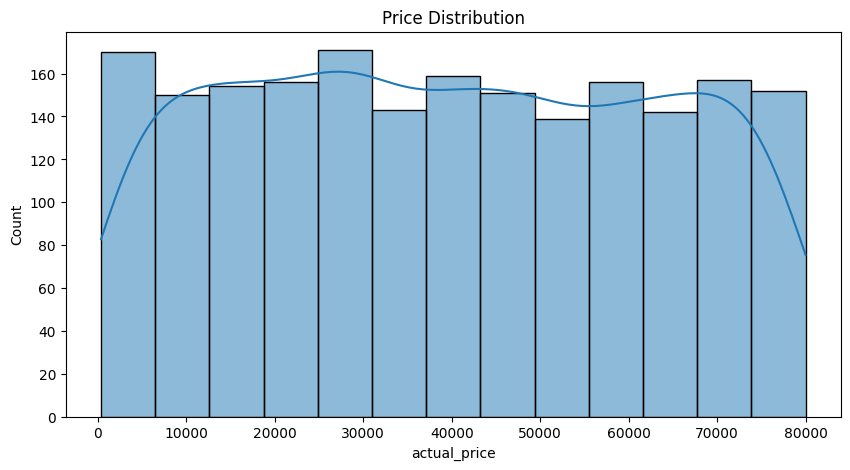

In [95]:
# price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['actual_price'], kde=True)
plt.title('Price Distribution')
plt.show()

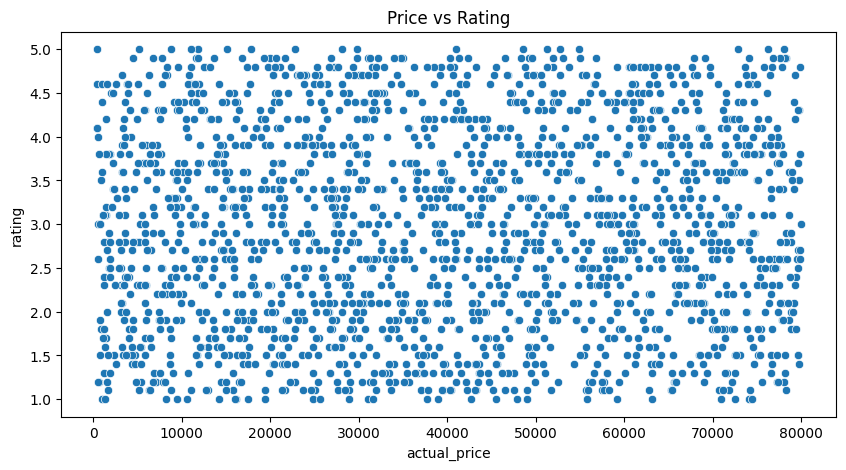

In [96]:
# price and rating relation
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='actual_price', y='rating')
plt.title('Price vs Rating')
plt.show()

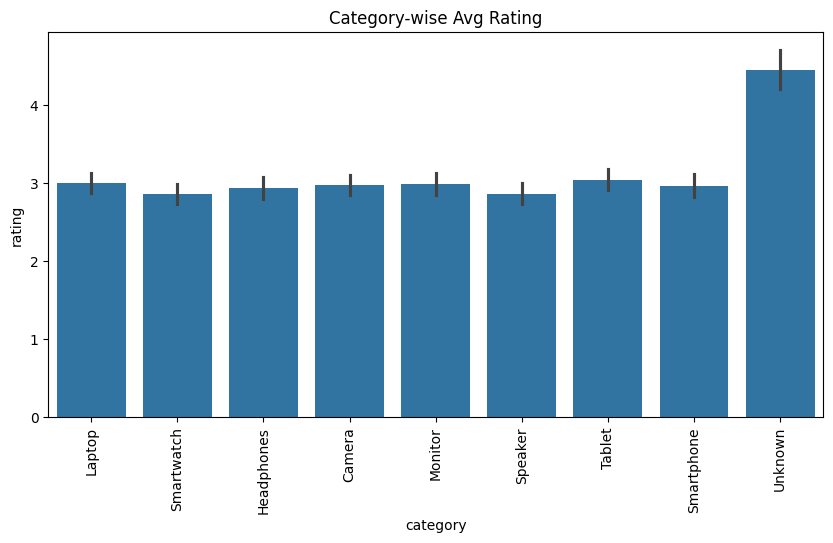

In [97]:
# category-wise avg rating
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='category', y='rating')
plt.title('Category-wise Avg Rating')
plt.xticks(rotation=90)
plt.show()

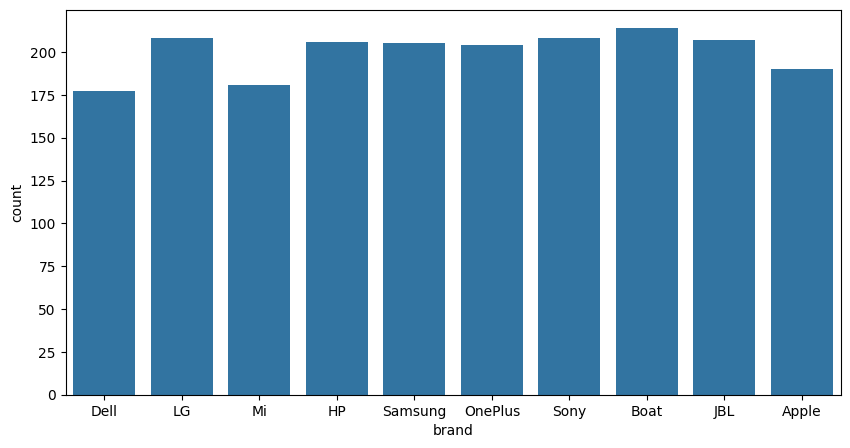

In [98]:
# products in brand - count plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='brand')
plt.show()

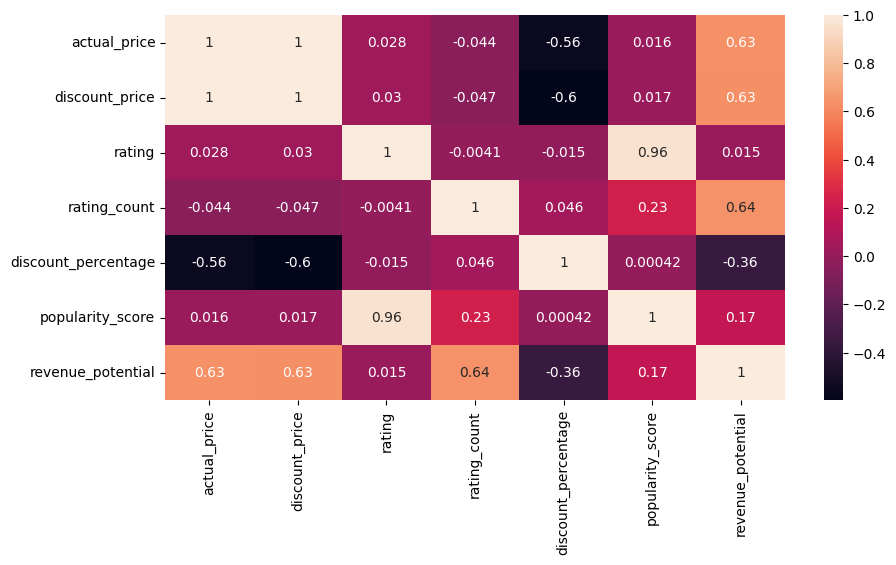

In [101]:
# numeric features correlation
corr = df[['actual_price', 'discount_price',
       'rating', 'rating_count', 'discount_percentage',
       'popularity_score', 'revenue_potential']].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True)
plt.show()


## Exporting cleaned data

In [102]:
df.to_csv('drive/MyDrive/Tek works/Exported Datasets/amazon_products_dataset_cleaned.csv', index=False)